## Tarea 1 física computacional
### Laura Sofía Arango
### CC. 1152471978

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def Euler(f, x0, xn, y0, h):
    x = np.arange(x0, xn, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    return(x, y)

def rk2(f, x0, xn, y0, h):
    x = np.arange(x0, xn, h)
    y = np.zeros(len(x))
  #K1 = k2 = np.zeros(n+1)
    y[0] = y0
    for i in range(1, len(x)):
        k1 = f(x[i-1] , y[i-1])
        k2 = f(x[i-1] + h , y[i-1] + h*k1)
        y[i] = y[i-1] + h*(k1 + k2)/2.
    return (x,y) 

def rk4(f, x0, xn, y0, h):
    x = np.arange(x0, xn, h)
    y = np.zeros(len(x))
  #K1 = k2 = k3 = k4 = np.zeros(n+1)

    y[0] = y0
    for i in range(1, len(y)):
        k1 = f(x[i-1] , y[i-1])
        k2 = f(x[i-1] + h/2. , y[i-1] + h*k1/2.)
        k3 = f(x[i-1] + h/2. , y[i-1] + h*k2/2.)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        y[i] = y[i-1] + (k1 + 2.*(k2 + k3) + k4)*h/6.
    return (x,y) 


### Punto 1

Los isótopos radiactivos a menudo se introducen en el cuerpo a través de la corriente sanguínea. Su
dispersión dentro del cuerpo puede monitorearse detectando la aparición de radiación en
diferentes órganos. La tasa de decaimiento o actividad del espécimen es representada por:

$$ -\frac{d N(t)}{d t}=\lambda N(t)$$
Donde 𝜆 es la contante de decaimiento y está relaciona con la vida media del espécimen $(𝑇_{1/2})$ por medio de $𝑇_{1/2}=\frac{ln(2)}{\lambda}$
Si le han suministrado 10 mg de $^{133}I$, un emisor $\beta ^{-}$ con vida media de 8 días. ¿Cuánto medicamento permanecerá en su organismo al cabo de 40 días?
Comparar los resultados de aplicar el método de Euler, de Euler mejorado y de Runge-Kutta de
cuarto orden para encontrar una solución aproximada de $𝑁(40)$ días. Utilice $h = 4$.

In [2]:
tm= 8 # tiempo de vida medio
ld= np.log(2)/tm
N0=10
t0=0
tn=40

# Se define función del decaímineto
def rad_d(t,N):
    f=-ld*N
    return(f)

#Con los mismos parámetros se resuelve la edo con diferentes métdos
euler=Euler(rad_d,t0,tn,N0,4)
Rk2=rk2(rad_d,t0,tn,N0,4)
Rk4=rk4(rad_d,t0,tn,N0,4)

# Calculo análitico
an=N0*np.exp(-ld*euler[0])

### a)

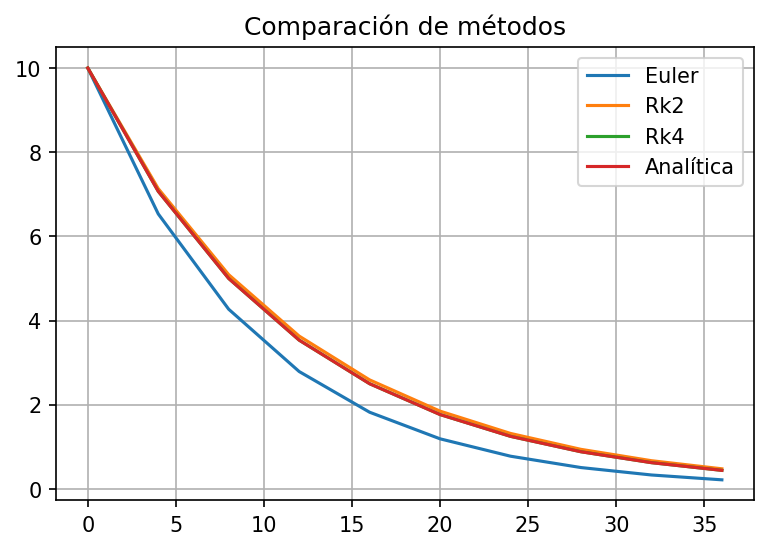

In [3]:

plt.figure(dpi=150)
plt.plot(euler[0],euler[1],label='Euler')
plt.plot(Rk2[0],Rk2[1],label='Rk2')
plt.plot(Rk4[0],Rk4[1],label='Rk4')
plt.plot(euler[0],an,label='Analítica')
plt.title('Comparación de métodos')
plt.grid()
plt.legend()
plt.show()

### b)

In [4]:
# Se organiza en directorio
datos={'$x_n$':euler[0],'Euler':euler[1],'Euler mejorado':Rk2[1],'RK4':Rk4[1],'Analítico':an}

#Se convierte en data frame
dtf=pd.DataFrame(datos)
dtf

$x_n$      Euler  Euler mejorado        RK4  Analítico
0      0  10.000000       10.000000  10.000000  10.000000
1      4   6.534264        7.134830   7.071462   7.071068
2      8   4.269661        5.090580   5.000557   5.000000
3     12   2.789909        3.632043   3.536125   3.535534
4     16   1.823000        2.591401   2.500557   2.500000
5     20   1.191197        1.848921   1.768259   1.767767
6     24   0.778359        1.319173   1.250418   1.250000
7     28   0.508601        0.941208   0.884228   0.883883
8     32   0.332333        0.671536   0.625278   0.625000
9     36   0.217155        0.479129   0.442163   0.441942

### Punto 2

El oscilador Duffing es un ejemplo de un oscilador no lineal amortiguado, el cual exhibe un
comportamiento caótico. Está descrito por la ecuación diferencial:$$\frac{d^{2} x}{d t^{2}}=-2 \gamma \frac{d x}{d t}-\alpha x-\beta x^{3}+F \cos (\omega t)$$

donde 𝐹 es la acción de una fuerza periódica de frecuencia 𝜔.

In [5]:
# Se define un array con los diferentes valores de F
F=[0.15,0.2,0.37,0.5,0.65]

x0,v0=1,0

# Se define función que resuelva la edo con runge kutta 4
def Duffin(x0,y0,F):
    a,b,gm,w=-1,1,0.15,1.2
    T=2*np.pi/w
    h=0.1
    t=0
    u = np.array([x0, v0])
    
    # Se define la función edo del potencial
    def f(t, u):         
        f1 = u[1] 
        f2 = -2*gm*u[1]-a*u[0]-b*(u[0])*(u[0])*(u[0])+F*np.cos(w*t)
        return np.array([f1, f2])

    tfin = 20*T
    
    tt=np.arange(0,tfin,h)
    xsol=np.zeros(len(tt))
    vsol=np.zeros(len(tt))
    xsol[0]=x0
    vsol[0]=v0
    for i in range(1,len(tt)):
        t=tt[i]
        k1 = f(t,u)
        k2 = f(t + h/2 , u + h*k1/2)
        k3 = f(t + h/2 , u + h*k2/2)
        k4 = f(t + h, u + h*k3)
        u = u + (k1 + 2*(k2 + k3) + k4)*h/6
        #print(u)
        xsol[i]=u[0]
        vsol[i]=u[1]
    return xsol,vsol,tt

In [6]:
xf1,vf1,tf1=Duffin(x0,v0,F[0])
x1,v1,t1=Duffin(x0,v0,F[1])
x2,v2,t2=Duffin(x0,v0,F[2])
x3,v3,t3=Duffin(x0,v0,F[3])
x4,v4,t4=Duffin(x0,v0,F[4])

<Figure size 720x576 with 0 Axes>

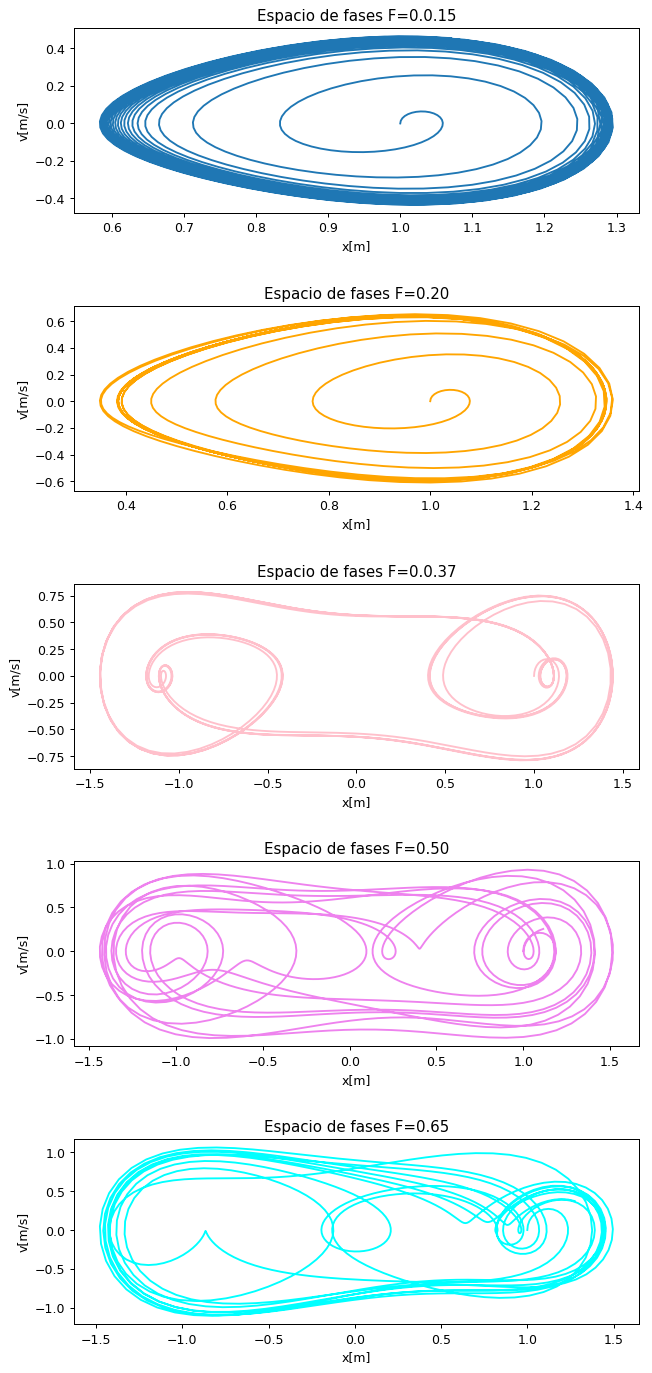

In [7]:
plt.figure(figsize=([10,8]))
fig, ax = plt.subplots(5,figsize=([7,15]),dpi=90)
fig.tight_layout()

plt.subplots_adjust(hspace=.5,wspace=.0)

ax[0].plot(xf1,vf1)
ax[1].plot(x1,v1,color='orange')
ax[2].plot(x2,v2,color='pink')
ax[3].plot(x3,v3,color='violet')
ax[4].plot(x4,v4,color='cyan')

ax[0].set_title('Espacio de fases F=0.0.15')
ax[1].set_title('Espacio de fases F=0.20')
ax[2].set_title('Espacio de fases F=0.0.37')
ax[3].set_title('Espacio de fases F=0.50')
ax[4].set_title('Espacio de fases F=0.65')

ax[0].set_ylabel('v[m/s]')
ax[1].set_ylabel('v[m/s]')
ax[2].set_ylabel('v[m/s]')
ax[3].set_ylabel('v[m/s]')
ax[4].set_ylabel('v[m/s]')

ax[0].set_xlabel('x[m]')
ax[1].set_xlabel('x[m]')
ax[2].set_xlabel('x[m]')
ax[3].set_xlabel('x[m]')
ax[4].set_xlabel('x[m]')

plt.show()

<Figure size 720x576 with 0 Axes>

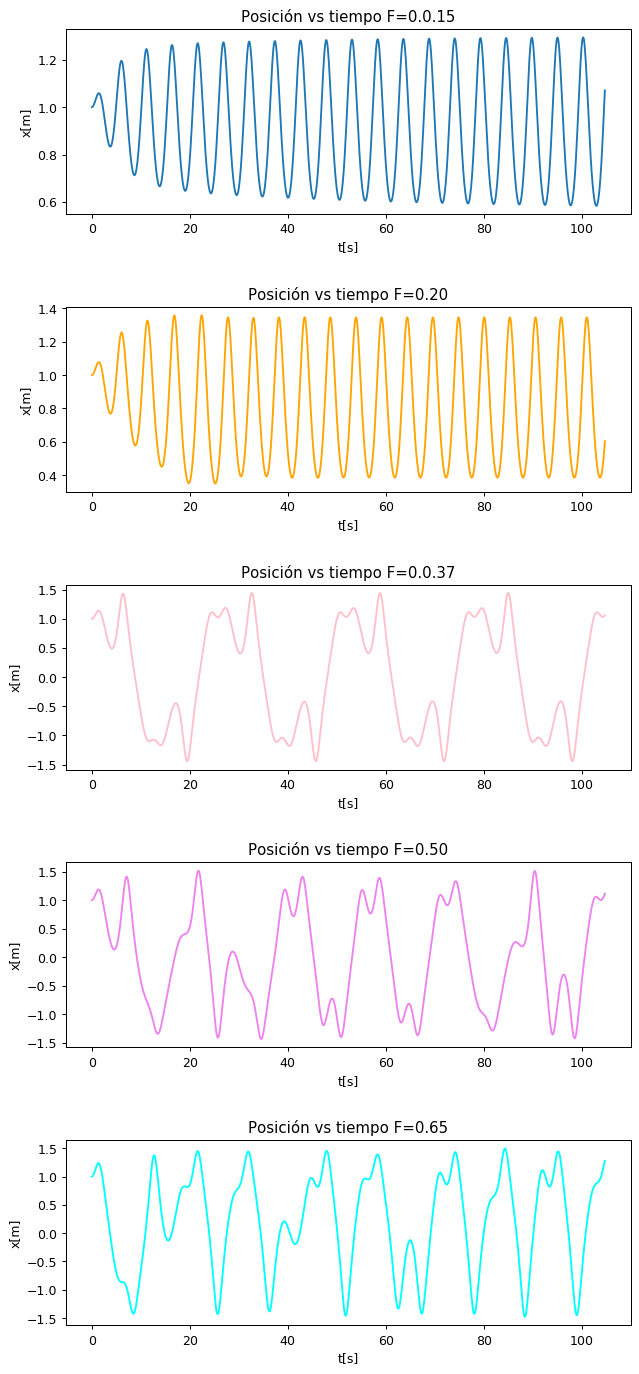

In [8]:
plt.figure(figsize=([10,8]))
fig, ax = plt.subplots(5,figsize=([7,15]),dpi=90)
fig.tight_layout()

plt.subplots_adjust(hspace=.5,wspace=.0)

ax[0].plot(tf1,xf1)
ax[1].plot(t1,x1,color='orange')
ax[2].plot(t2,x2,color='pink')
ax[3].plot(t3,x3,color='violet')
ax[4].plot(t4,x4,color='cyan')

ax[0].set_title('Posición vs tiempo F=0.0.15')
ax[1].set_title('Posición vs tiempo F=0.20')
ax[2].set_title('Posición vs tiempo F=0.0.37')
ax[3].set_title('Posición vs tiempo F=0.50')
ax[4].set_title('Posición vs tiempo F=0.65')

ax[0].set_ylabel('x[m]')
ax[1].set_ylabel('x[m]')
ax[2].set_ylabel('x[m]')
ax[3].set_ylabel('x[m]')
ax[4].set_ylabel('x[m]')

ax[0].set_xlabel('t[s]')
ax[1].set_xlabel('t[s]')
ax[2].set_xlabel('t[s]')
ax[3].set_xlabel('t[s]')
ax[4].set_xlabel('t[s]')

plt.show()